# **Step 0: Importing Libraries & preemptive requirements**


Importing libraries before helps in identifying necessary dependencies within the code, this step is to also initialize a connection with the kaggle dataset.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
NTFLX = pd.read_csv('/content/drive/MyDrive/Capstone_ST1/NFLX.csv')

#  **Step 1: Reading the dataset**



In [ ]:

# Before dropping duplicate rows
print('Shape before deleting duplicate values:', NTFLX.shape)

Shape before deleting duplicate values: (1009, 7)


In [ ]:

# After dropping duplicate rows
NTFLXdata=NTFLX.drop_duplicates()
print('Shape after deleting duplicate values:', NTFLXdata.shape)

Shape after deleting duplicate values: (1009, 7)


In [ ]:
NTFLXdata.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
# Sample of the first 10 rows of data
NTFLXdata.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [ ]:
# Sample of the last 10 rows of data
NTFLXdata.tail(10)


,Date,Open,High,Low,Close,Adj Close,Volume
999,2022-01-24,383.910004,387.260010,351.459991,387.149994,387.149994,32346000
1000,2022-01-25,379.140015,387.709991,365.130005,366.420013,366.420013,15145800
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,359.700012,12684000
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,386.700012,24324700
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


# **Key observations from Step 1 about Data Description**
This file contains 1009 days of netflix stock activity
There are 7 attributes listed below:


*   Date - Year, month and day (in that order) of every date that the stock was available to be purchased
*   Open - the amount the stock price opens at
*   High - the highest amount the stock was at during the day
*   Low - the lowest amount the stock was at during the day
*   Close - the amount the stock price closed at
*   Adj. Close - the **true** amount the stock price closed at (this is because there are dividends and stock splits that can occur)
*   Volume - how much stock was bought/sold in that day

# **Step 2 : Problem Statement Definition**


*   Creating a prediction model to predict the opening cost for netflix stock in a year
*   Target Variable: ["Open"] Predictors/features: High, Low, Close, Adj. Close and Volume







# **Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.**



*   Based on the problem statement we need to create a supervised ML Regression model, as the target variable is Continuous.

*   This is also based on the fact that the Netflix stock price predicition dataset only contains continuous variables or miscellaneous variables such as Date.


# **Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed).**

* data distribution is satisfactory, there are no outstanding outliers or is heavily skewed in either direction although the graph displays a positive skew.

* There is sufficient amount of data to make a comparison


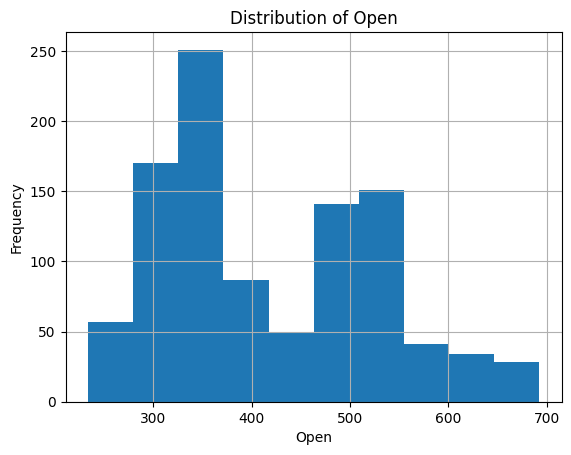

In [ ]:
%matplotlib inline

# This is our target variable, Open.
# it is a positive distribution as the peak of the graph
# lays within the left of the graph
NTFLXdata["Open"].hist()
plt.title("Distribution of Open")
plt.xlabel("Open")
plt.ylabel("Frequency")
plt.show()

# **Step 5: Basic Exploratory Data Analysis**

Basic exploration of data in this dataset includes:
* assessing the data (whether it is quantitive, qualitive, catergorical or continuous)
* assessing the individual columns relavance to the column we are comparing the the rest of the data too
* There exists no variables that have any missing values.
* There exists no qualitive variables that will intefere with the machine learning model

<Axes: xlabel='Open', ylabel='Low'>

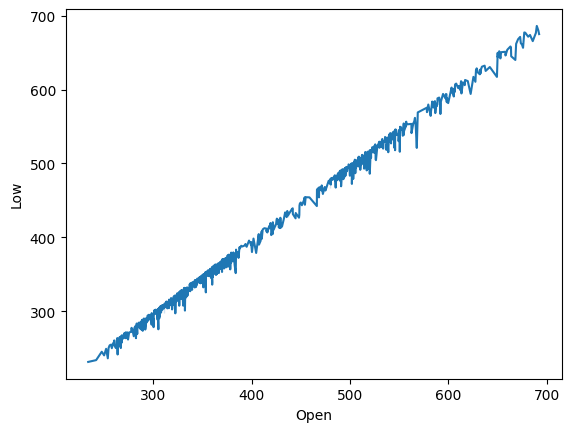

In [ ]:
sns.lineplot(x="Open", y="Low", data=NTFLXdata)

<Axes: xlabel='Open', ylabel='High'>

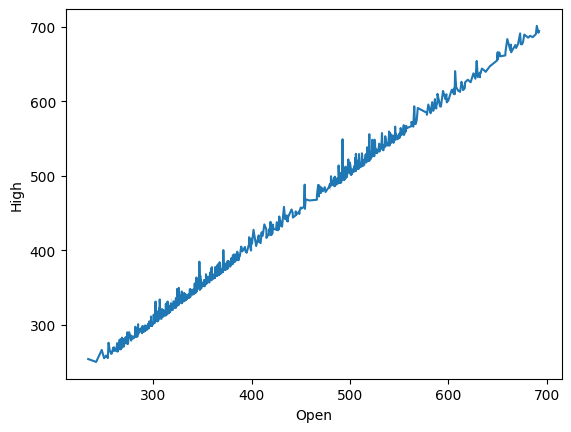

In [ ]:
sns.lineplot(x="Open", y="High", data=NTFLXdata)

In [ ]:
# There exists no qualitative variables
# There does not exist any rows or column that have missing variables
# Data count is identical as
NTFLXdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
# Sample of the first 10 rows of data
NTFLXdata.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [ ]:
# Sample of the last 10 rows of data
NTFLXdata.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
999,2022-01-24,383.910004,387.260010,351.459991,387.149994,387.149994,32346000
1000,2022-01-25,379.140015,387.709991,365.130005,366.420013,366.420013,15145800
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,359.700012,12684000
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,386.700012,24324700
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [ ]:
# reason why I did not add an argument within the brackets
# ("include = "All"") is because it would lead to null values appearing

NTFLXdata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# All variables are >20, this means there exists no catergorical variables
# there only exists continuous variables within this dataset
NTFLXdata.nunique()

,0
Date,1009
Open,976
High,983
Low,989
Close,988
Adj Close,988
Volume,1005


# **Observations from Step 5 - Basic Exploratory Data Analysis**

*   Date - Continuous. Selected.
*   Open - Continuous. Selected. This is the Target or Class Variable, which needs to be predicted by the proposed regression model
*   High - Continuous. Selected.
*   Low - Continuous. Selected.
*   Close - Continuous. Selected.
*   Adj. Close - Continuous. Selected.
*   Volume - Continuous. Selected.

# **Step 6: Removing Unwanted columns**


*   There are no qualitative columns in the NTFLX dataset.
*   Hence no need to remove any column.


# **Step 7: Visual Exploratory Data Analysis**

* this is not applicable to the dataset as it requires categorical data values, the Netflix dataset has no categorical values.

# **Step 8: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms**

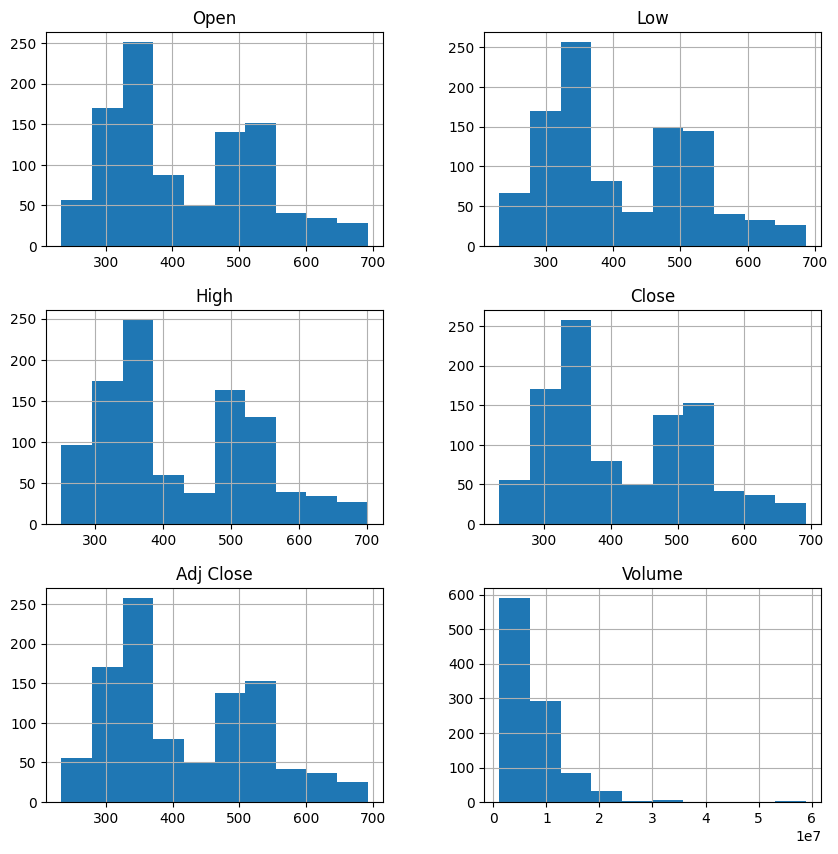

In [ ]:
NTFLXdata.hist(["Open", "Low", "High", "Close", "Adj Close", "Volume"], figsize=(10, 10))
plt.show()

In the above histograms Open High Low Close and Adj Close have a fair spread of data, Volume is heavily skewed to the left. This is such that the volume is positively skewed.

These are the selected columns for the interpretting the data:


---



*   Open : Selected. The distribution is good.
*   Close : Selected. The distribution is good.
*   Low : Selected. The distribution is good.
*   High : Selected. The distribution is good.
*   Adj Close : Selected. The distribution is good.
*   Volume : Skewed but available. The distribution is good.

---


# **Step 9: Outlier Analysis**

There are no significant outliers, and if it is beyond an amount the total amount of outliers do not surpass 30%

# **Step 10:Visualising Data Distribution after outlier removal**

It will be the exact same as there was no required data that needed to be removed that would affect the end result.

# **Step 11: Missing Values Analysis**

In the figure below states that all rows and columns are filled with their correlating data.

1.   List item
2.   List item



In [ ]:
NTFLX.info()

print("\n")
print(NTFLX.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# **Observations from Step 11 - Missing Values Analysis**

* There is no requirement to replace or delete any rows as it states in the figure above there is no missing columns
* No missing values in this kaggle dataset!

# **Step 12: Feature Selection (Attribute Selection)**

Since all relationships are going to be continuous these are the best selected visualizations:



*   **Visual exploration of relationship between variables**
*   Continuous Vs Continuous ---- Scatter Plot
*   **Statistical measurement of relationship strength between variables**
*   Continuous Vs Continuous ---- Correlation matrix
*   **For this dataset, the Target variable is Continuous**
*   Continuous Target Variable Vs Continuous Predictor



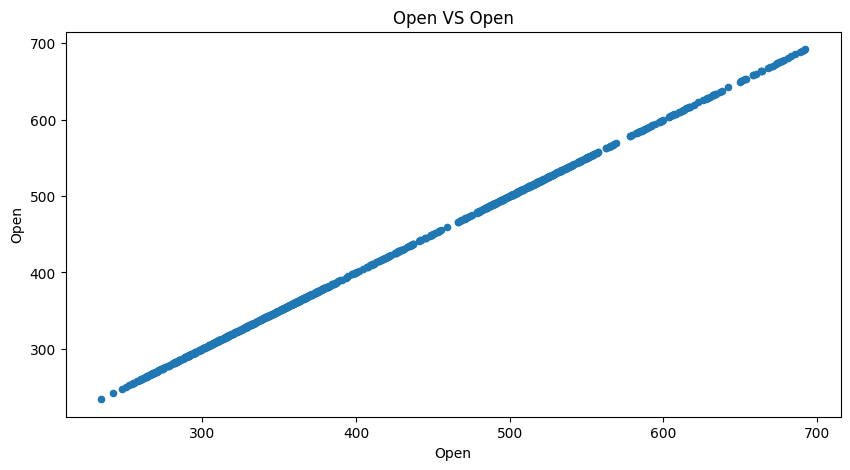

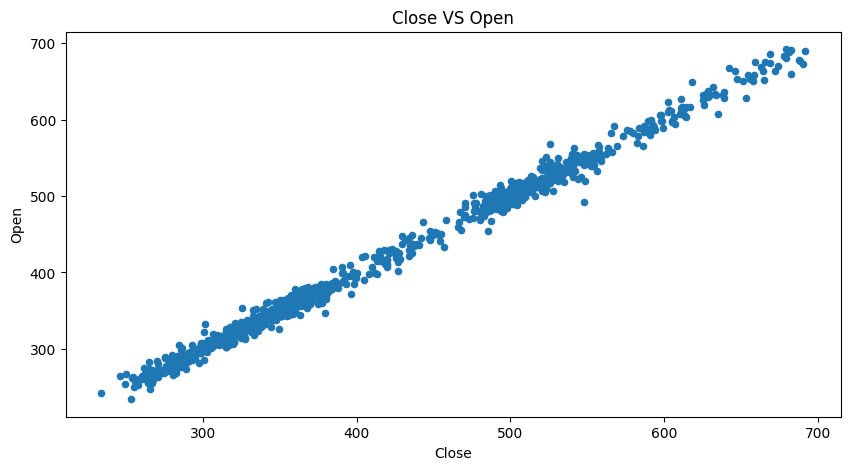

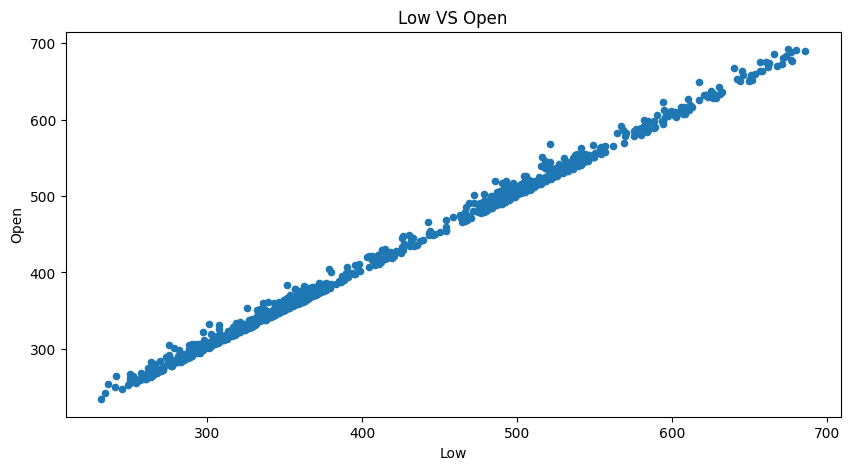

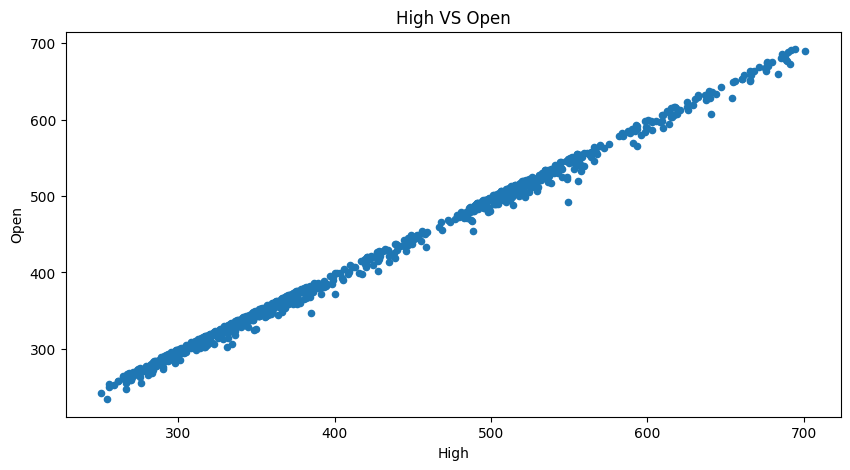

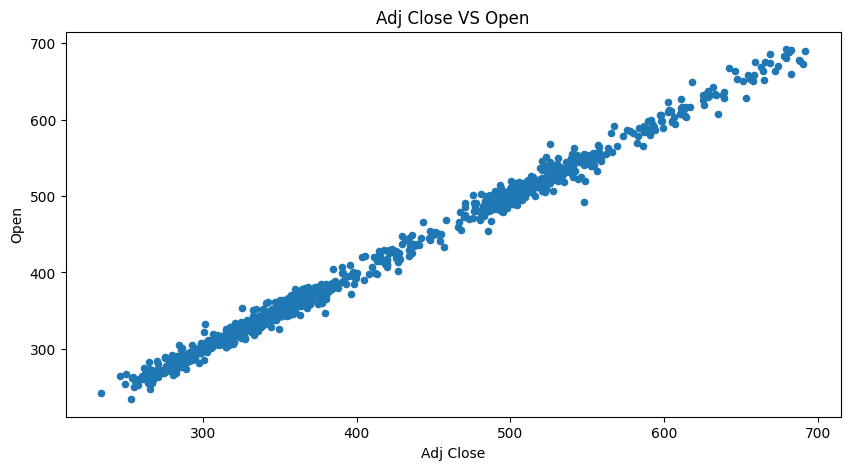

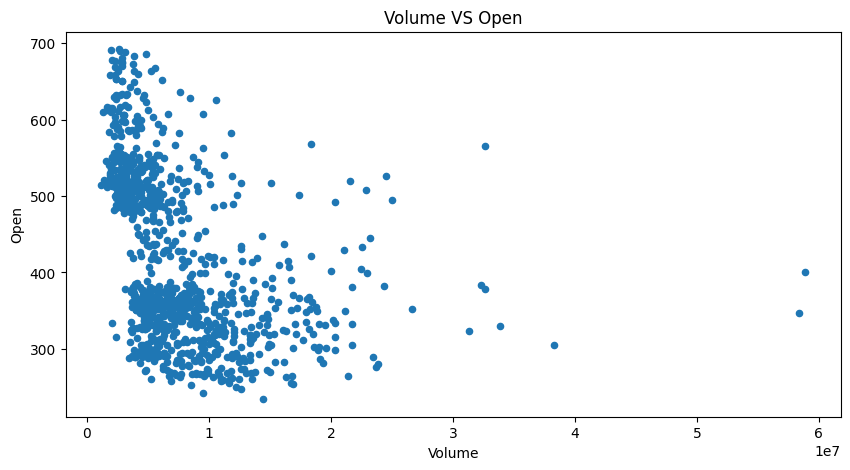

In [ ]:
ContinuousCols=['Open', 'Close', 'Low', 'High', 'Adj Close', 'Volume']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
  NTFLXdata.plot.scatter(x=predictor, y='Open', figsize=(10,5), title=predictor+" VS "+ 'Open')


# **Observations from Step 12 - Scatter plot correlation analysis**

There is should be a **TREND** within all these graphs it is about determining the right one

whether it is Increasing, Decreasing, or no TREND.

* Open vs Open is an increasing trend
* Open vs Close is an increasing trend
* Open vs Low is an increasing trend
* Open vs High is an increasing trend
* Open vs Adj Close is an increasing trend
* Open vs Volume has no trend

# **Step 13: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**



In [ ]:
ContinuousCols=['Open', 'Close', 'Low', 'High', 'Adj Close', 'Volume']
CorrelationData=NTFLXdata[ContinuousCols].corr()
CorrelationData

,Open,Close,Low,High,Adj Close,Volume
Open,1.000000,0.996812,0.998508,0.998605,0.996812,-0.415838
Close,0.996812,1.000000,0.998544,0.998551,1.000000,-0.413362
Low,0.998508,0.998544,1.000000,0.998203,0.998544,-0.432116
High,0.998605,0.998551,0.998203,1.000000,0.998551,-0.400699
Adj Close,0.996812,1.000000,0.998544,0.998551,1.000000,-0.413362
Volume,-0.415838,-0.413362,-0.432116,-0.400699,-0.413362,1.000000


In [ ]:
# We need to filter out any value that is no above 0.5
# for that we take the abs (absolute value) of the correlation data
# abs creates the whole dataset so that it becomes positive
# then it filters anything below or equivalent to (<=) 0.5

CorrelationData['Open'][abs(CorrelationData['Open']) > 0.5 ]

,Open
Open,1.000000
Close,0.996812
Low,0.998508
High,0.998605
Adj Close,0.996812


# **Observations from Step 13 - Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**


Final selected continuous columns:
*   Open
*   Close
*   Low
*   High
*   Adj Close




# **Step 14 - Box plots (Categorical vs Continuous) is no applicable to this dataset as there is no categorical data**

* Therefore there is no observation for this section.

# **Step 15: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test is not applicate as there is no categorical data**

* There there is no observation we can make for this section aswell.

# **Step 16: Selecting final Predictors/Features for building Machine Learning/AI model.**

The following predictors will be used to build the model:
*   Open
*   Close
*   Low
*   High
*   Adj Close


In [ ]:
SelectedColumns=["Open", "Close", "Low", "High", "Adj Close"]
# Selecting final columns
DataForML=NTFLXdata[SelectedColumns]
DataForML.head()

,Open,Close,Low,High,Adj Close
0,262.000000,254.259995,250.029999,267.899994,254.259995
1,247.699997,265.720001,245.000000,266.700012,265.720001
2,266.579987,264.559998,264.329987,272.450012,264.559998
3,267.079987,250.100006,250.000000,267.619995,250.100006
4,253.850006,249.470001,236.110001,255.800003,249.470001


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)
# Adding Target Variable to the data
DataForML_Numeric['Open']=NTFLX['Open']
# Printing sample rows
DataForML_Numeric.head()

,Open,Close,Low,High,Adj Close
0,262.000000,254.259995,250.029999,267.899994,254.259995
1,247.699997,265.720001,245.000000,266.700012,265.720001
2,266.579987,264.559998,264.329987,272.450012,264.559998
3,267.079987,250.100006,250.000000,267.619995,250.100006
4,253.850006,249.470001,236.110001,255.800003,249.470001


# **Step 17: Machine Learning Model Development**

---
# Test 1: Multiple Linear Regression Algorithm

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable="Open"
Predictors=["Close", "Low", "High", "Adj Close"]
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


# x = are the independent variables
# y = is the dependent variable
# train = short for training
# test = short for training
# train_test_split helps sort your data into subsets (Python & Stojiljković, 2024)
# test_size is 0.3 or 30% of the whole dataset
# random_state provides the same seed so the test uses the same random variables
# e.g a Minecraft seed generates the same EXACT world block for block

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# minmax = normalization
# standard = standardization
# Choose between standardization and MinMAx normalization


#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()


# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(706, 4)
(706,)
(303, 4)
(303,)


In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
# Printing all the parameters of Linear regression
print(RegModel)
# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

#linear regression is used to predict a variable using another variable
#as the r2 score gets closer to 1 it means that the graph is more accurate

LinearRegression()
R2 Value: 0.9986601874260301


In [ ]:
print('\n      Model Validation and Accuracy Calculations - Multiple Linear Regression      ')
print('--------------------------------------------------------')
# Measuring accuracy on Testing Data


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)



# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
#print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)


# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# MAPE = mean (average) absolute percentage error
# APE = absolute percentage error
# MAPE and APE are used to forecast the accuracy of a time-series model such as the kaggle dataset used
# since the kaggle data set for netflix stock price prediction has time dependency.


      Model Validation and Accuracy Calculations - Multiple Linear Regression      
--------------------------------------------------------
      Close       Low      High  Adj Close        Open  PredictedOpen
0  0.141369  0.133140  0.107696   0.141369  294.500000          294.0
1  0.579280  0.585916  0.565706   0.579280  504.010010          503.0
2  0.662589  0.661280  0.651996   0.662589  544.270020          539.0
3  0.656539  0.648090  0.634454   0.656539  533.200012          529.0
4  0.915838  0.873719  0.895679   0.915838  628.890015          636.0
Mean Accuracy on test data: 99.29668208018084
Median Accuracy on test data: 99.38081976974843

Accuracy values for 10-fold Cross Validation:
 [99.1976404  99.15669865 99.23864231 99.36902309 99.35552124 98.92014575
 99.28425122 99.36162635 99.50660419 99.31543585]

Final Average Accuracy of the model: 99.27


# Test 2: Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9976589162010148


<Axes: ylabel='Frequency'>

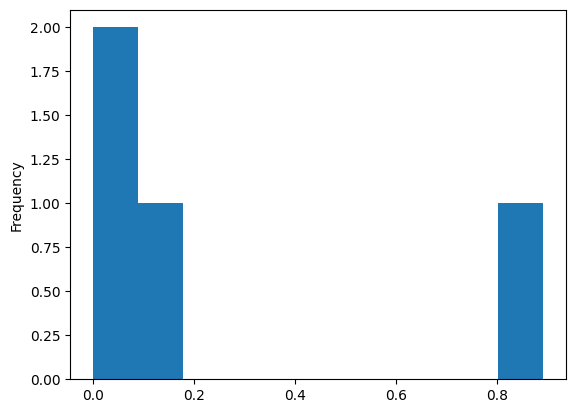

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20
# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='hist')

In [ ]:
print('\n      Model Validation and Accuracy Calculations - Decision Tree Regressor       ')
print('--------------------------------------------------------')
# Measuring accuracy on Testing Data


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)



# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
#print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)


# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# MAPE = mean (average) absolute percentage error
# APE = absolute percentage error
# MAPE and APE are used to forecast the accuracy of a time-series model such as the kaggle dataset used
# since the kaggle data set for netflix stock price prediction has time dependency.


      Model Validation and Accuracy Calculations - Decision Tree Regressor       
--------------------------------------------------------
      Close       Low      High  Adj Close        Open  PredictedOpen
0  0.141369  0.133140  0.107696   0.141369  294.500000          292.0
1  0.579280  0.585916  0.565706   0.579280  504.010010          501.0
2  0.662589  0.661280  0.651996   0.662589  544.270020          537.0
3  0.656539  0.648090  0.634454   0.656539  533.200012          524.0
4  0.915838  0.873719  0.895679   0.915838  628.890015          653.0
Mean Accuracy on test data: 98.579389239903
Median Accuracy on test data: 98.84169884169884

Accuracy values for 10-fold Cross Validation:
 [98.33834726 98.27771699 98.34246119 98.72888905 98.46802    96.95560951
 98.22514446 98.84934755 98.90502116 95.29378243]

Final Average Accuracy of the model: 98.04


# Test 3: Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9972107428873146


<Axes: ylabel='Frequency'>

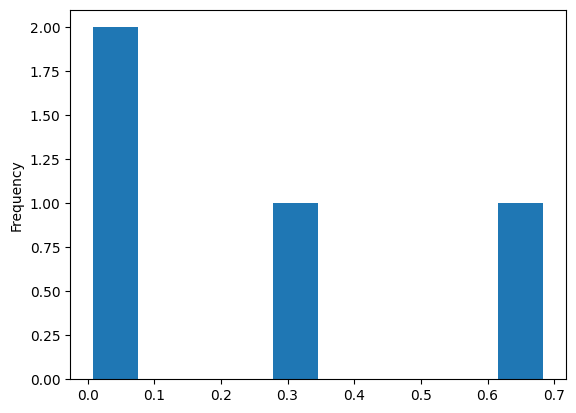

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000
# Printing all the parameters of Random Forest

print(RegModel)
# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns

%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='hist')

In [ ]:
print('\n      Model Validation and Accuracy Calculations - Random Forest Regressor       ')
print('--------------------------------------------------------')
# Measuring accuracy on Testing Data


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)



# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
#print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)


# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# MAPE = mean (average) absolute percentage error
# APE = absolute percentage error
# MAPE and APE are used to forecast the accuracy of a time-series model such as the kaggle dataset used
# since the kaggle data set for netflix stock price prediction has time dependency.


      Model Validation and Accuracy Calculations - Random Forest Regressor       
--------------------------------------------------------
      Close       Low      High  Adj Close        Open  PredictedOpen
0  0.141369  0.133140  0.107696   0.141369  294.500000          291.0
1  0.579280  0.585916  0.565706   0.579280  504.010010          496.0
2  0.662589  0.661280  0.651996   0.662589  544.270020          543.0
3  0.656539  0.648090  0.634454   0.656539  533.200012          523.0
4  0.915838  0.873719  0.895679   0.915838  628.890015          646.0
Mean Accuracy on test data: 98.61088876316245
Median Accuracy on test data: 98.80989000671914

Accuracy values for 10-fold Cross Validation:
 [98.50124072 98.47649695 98.28535762 98.84462864 98.62464945 97.29530499
 98.53945688 98.68355452 99.05268921 94.37615492]

Final Average Accuracy of the model: 98.07


# Test 4: AdaBoost Algorithm

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9877040628662592


<Axes: ylabel='Frequency'>

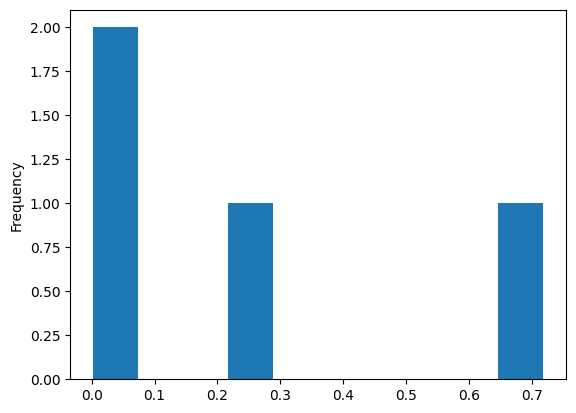

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, estimator=DTR ,learning_rate=0.04)
# Printing all the parameters of Adaboost
print(RegModel)
# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='hist')

In [ ]:
print('\n      Model Validation and Accuracy Calculations - AdaBoost Algorithm       ')
print('--------------------------------------------------------')
# Measuring accuracy on Testing Data


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)



# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
#print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)


# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# MAPE = mean (average) absolute percentage error
# APE = absolute percentage error
# MAPE and APE are used to forecast the accuracy of a time-series model such as the kaggle dataset used
# since the kaggle data set for netflix stock price prediction has time dependency.


      Model Validation and Accuracy Calculations - AdaBoost Algorithm       
--------------------------------------------------------
      Close       Low      High  Adj Close        Open  PredictedOpen
0  0.141369  0.133140  0.107696   0.141369  294.500000          279.0
1  0.579280  0.585916  0.565706   0.579280  504.010010          493.0
2  0.662589  0.661280  0.651996   0.662589  544.270020          528.0
3  0.656539  0.648090  0.634454   0.656539  533.200012          527.0
4  0.915838  0.873719  0.895679   0.915838  628.890015          658.0
Mean Accuracy on test data: 97.2959986524459
Median Accuracy on test data: 97.78402296590131

Accuracy values for 10-fold Cross Validation:
 [97.43445985 97.1932106  96.83187652 97.33024882 96.48864596 94.55075597
 98.56230899 97.71041524 98.17167457 93.15007429]

Final Average Accuracy of the model: 96.74


# Test 5: XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:08:49] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Value: 0.9995573266762089


<Axes: ylabel='Frequency'>

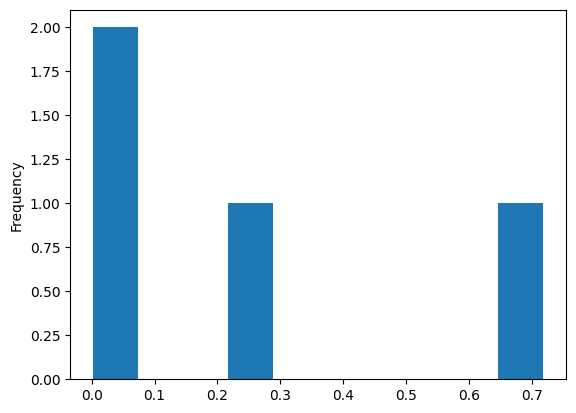

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
learning_rate=0.1,
n_estimators=1000,
objective='reg:linear',
booster='gbtree')
# Printing all the parameters of XGBoost
print(RegModel)
# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
#feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='hist')

In [ ]:
print('\n      Model Validation and Accuracy Calculations - XGBoost Regressor       ')
print('--------------------------------------------------------')
# Measuring accuracy on Testing Data


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)



# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
#print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)


# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# MAPE = mean (average) absolute percentage error
# APE = absolute percentage error
# MAPE and APE are used to forecast the accuracy of a time-series model such as the kaggle dataset used
# Since the kaggle data set for netflix stock price prediction has time dependency.


      Model Validation and Accuracy Calculations - XGBoost Regressor       
--------------------------------------------------------
      Close       Low      High  Adj Close        Open  PredictedOpen
0  0.141369  0.133140  0.107696   0.141369  294.500000          295.0
1  0.579280  0.585916  0.565706   0.579280  504.010010          503.0
2  0.662589  0.661280  0.651996   0.662589  544.270020          540.0
3  0.656539  0.648090  0.634454   0.656539  533.200012          528.0
4  0.915838  0.873719  0.895679   0.915838  628.890015          649.0
Mean Accuracy on test data: 99.08070771788859
Median Accuracy on test data: 99.27525299138964


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:01:51] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:01:53] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:01:56] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:01:57] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:


Accuracy values for 10-fold Cross Validation:
 [98.93845845 98.88220252 98.95707453 99.2290341  99.07337926 98.23153075
 98.79484575 99.06412414 99.30582993 95.54667793]

Final Average Accuracy of the model: 98.6


<Axes: >

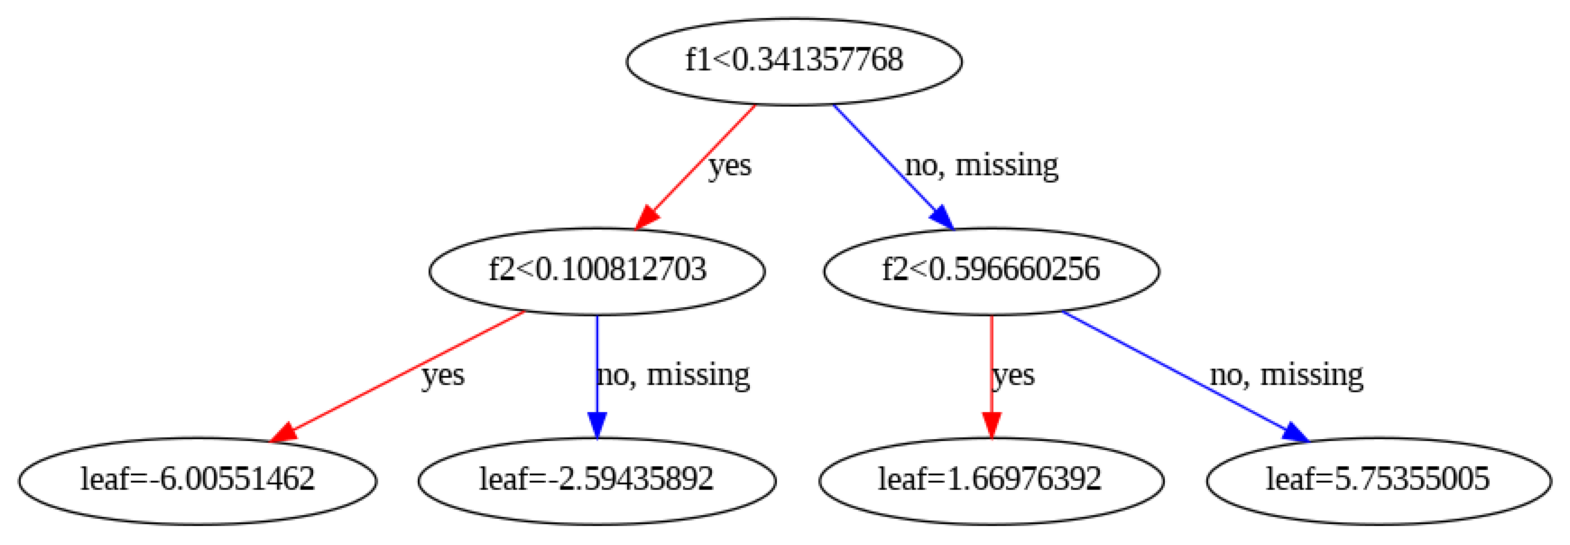

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# Test 6: KNN (K-Nearest Neighbor)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)
# Printing all the parameters of KNN
print(RegModel)
# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9989053041164012


In [ ]:
print('\n      Model Validation and Accuracy Calculations - KNN (K-Nearest Neighbor)      ')
print('--------------------------------------------------------')
# Measuring accuracy on Testing Data


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)



# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
#print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)


# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# MAPE = mean (average) absolute percentage error
# APE = absolute percentage error
# MAPE and APE are used to forecast the accuracy of a time-series model such as the kaggle dataset used
# since the kaggle data set for netflix stock price prediction has time dependency.


      Model Validation and Accuracy Calculations - KNN (K-Nearest Neighbor)      
--------------------------------------------------------
      Close       Low      High  Adj Close        Open  PredictedOpen
0  0.141369  0.133140  0.107696   0.141369  294.500000          297.0
1  0.579280  0.585916  0.565706   0.579280  504.010010          501.0
2  0.662589  0.661280  0.651996   0.662589  544.270020          540.0
3  0.656539  0.648090  0.634454   0.656539  533.200012          527.0
4  0.915838  0.873719  0.895679   0.915838  628.890015          648.0
Mean Accuracy on test data: 99.06420246968838
Median Accuracy on test data: 99.26605504587155

Accuracy values for 10-fold Cross Validation:
 [98.99273625 98.77281922 98.94054718 99.27360242 99.0850885  98.32938236
 98.93651216 99.19141624 99.36935934 95.68999904]

Final Average Accuracy of the model: 98.66


# Test 7: SVM (Support Vector Machine)

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)
# Printing all the parameters
print(RegModel)
# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='hist')

SVR(C=50, gamma=0.01)
R2 Value: 0.9921527575095805


In [ ]:
print('\n      Model Validation and Accuracy Calculations - SVM (Support Vector Machine)      ')
print('--------------------------------------------------------')
# Measuring accuracy on Testing Data


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)



# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
#print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)


# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# MAPE = mean (average) absolute percentage error
# APE = absolute percentage error
# MAPE and APE are used to forecast the accuracy of a time-series model such as the kaggle dataset used
# since the kaggle data set for netflix stock price prediction has time dependency.


      Model Validation and Accuracy Calculations - SVM (Support Vector Machine)      
--------------------------------------------------------
      Close       Low      High  Adj Close        Open  PredictedOpen
0  0.141369  0.133140  0.107696   0.141369  294.500000          304.0
1  0.579280  0.585916  0.565706   0.579280  504.010010          494.0
2  0.662589  0.661280  0.651996   0.662589  544.270020          529.0
3  0.656539  0.648090  0.634454   0.656539  533.200012          525.0
4  0.915838  0.873719  0.895679   0.915838  628.890015          631.0
Mean Accuracy on test data: 98.25075698983511
Median Accuracy on test data: 98.54344346646798

Accuracy values for 10-fold Cross Validation:
 [98.16729595 98.30397165 98.20859609 98.87120271 97.94399355 98.55247143
 98.4743344  98.62349093 98.81764702 97.38549888]

Final Average Accuracy of the model: 98.33


# **Step 18: Machine Learning Model Decision**

Since XGBoost has provided the most accurate R^2 value (0.9995573266762089)

I will choose XGBoost for my data as it is the most accurate representation of the graph



# **References**

```
# References
# ------------------------------------
# K. Gurpreet. (2024). Week 10 Capstone Project Stage1 [Online]. Available:
# https://uclearn.canberra.edu.au/courses/16243/pages/week-10-capstone-project-stage1?module_item_id=1257928
#
# Albertson, A. (2021, March 9). All Guides: Data Module #1: What is Research Data?: Qualitative vs. Quantitative. Libguides.macalester.edu.
https://libguides.macalester.edu/c.php?g=527786&p=3608639#:~:text=Qualitative%20data%20describes%20qualities%20or
#
# Difference between Standard scaler and MinMaxScaler. (n.d.). Stack Overflow. Retrieved August 26, 2024, from
# https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscalerShah, J. (2022, February 5).
#
# Netflix Stock Price Prediction. Www.kaggle.com.
# https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-predictionZach.
# (2019, February 24).
#
# What is a Good R-squared Value? Statology.
# https://www.statology.org/good-r-squared-value/#:~:text=For%20example%2C%20in%20scientific%20studies
#
#Python, R., & Stojiljković, M. (2024, July 15). Split Your Dataset With scikit-learn’s train_test_split() – Real Python. Realpython.com.
#https://realpython.com/train-test-split-python-data/
# ------------------------------------
```